In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 

# Parte 1 do experimento

In [2]:
#Dados
m_1 = 235.38 #g
m_2 = 235.88 #g
dist = [30,25,20,15,10,5, 0] #cm
t_30 = [32.28,32.19,32.19,32.25,32.25] #s
t_25 = [27.31,27.37,27.35,27.34,27.44] #s
t_20 = [22.63,22.72,22.63,22.69,22.69] #s
t_15 = [18.16,18.19,18.16,18.18,18.15] #s
t_10 = [14.13,14.06,14.06,14.19,14.10] #s
t_5 =  [10.97,10.97,10.97,11.00,10.96] #s
t_sem_peso = [9.63,9.68,9.56,9.63,9.62] #s
t_aux = [t_30,t_25,t_20,t_15,t_10,t_5,t_sem_peso]

In [3]:
# incertezas:
inc_massa = 0.01 #g
inc_dist = 0.05 #cm
inc_cronometro = 0.01/2 #s

In [4]:
#Convertendo alguns dados para o SI:

m_1 = m_1/1000 #kg
m_2 = m_2/1000 #kg
inc_massa = inc_massa/1000 #kg


dist = np.array(dist)/100 #m
inc_dist = inc_dist/100 #m

print(dist)
print(inc_dist)

[0.3  0.25 0.2  0.15 0.1  0.05 0.  ]
0.0005


## Cálculo do período médio e sua incerteza

In [5]:
t_mean = []
inc_t_mean = []

for j in t_aux:
    #Calculando o período médio
    t_mean.append(np.mean(j)/5)
    
    #Calculando a incerteza via desvio padrão
    inc_t = (np.std(j)/(np.sqrt(len(j)-1)))/5
    #Calculando a incerteza considerando também a incerteza do cronômetro:
    inc_t = np.sqrt(np.power(inc_t,2) + np.power(inc_cronometro,2))
    #Arredondando a incerteza
    inc_t = float('{:g}'.format(float('{:.1g}'.format(inc_t))))
    inc_t_mean.append(inc_t)

print(t_mean)
print(inc_t_mean)

#for k in inc_t_mean:
    

[6.4464, 5.4724, 4.5344, 3.6336, 2.8215999999999997, 2.1948, 1.9248]
[0.006, 0.007, 0.006, 0.005, 0.007, 0.005, 0.006]


##### Apenas um teste
inc_t_mean = []
t_aux = [np.array(t_30)/5,np.array(t_25)/5,np.array(t_20)/5,np.array(t_15)/5,np.array(t_10)/5,np.array(t_5)/5,np.array(t_sem_peso)/5]
for j in t_aux:
    
    #Calculando a incerteza via desvio padrão
    inc_t = (np.std(j)/(np.sqrt(len(j)-1)))
    #Calculando a incerteza considerando também a incerteza do cronômetro:
    inc_t = np.sqrt(np.power(inc_t,2) + np.power(inc_cronometro,2))
    #Arredondando a incerteza
    inc_t = float('{:g}'.format(float('{:.1g}'.format(inc_t))))
    inc_t_mean.append(inc_t)

print(inc_t_mean)

In [6]:
#Arredondando o período segundo a incerteza:
for i,k in enumerate(inc_t_mean):
    casas = str(k)[::-1].find('.')
    t_mean[i] = np.round(t_mean[i],casas)

print(t_mean)

[6.446, 5.472, 4.534, 3.634, 2.822, 2.195, 1.925]


Nós sabemos que em oscilações rotacionais, o período de um corpo com momento de inércia $I$ é dado por:

$$T = 2\pi\sqrt{\frac{I}{D}} \implies T^2 = 4\pi^2 \frac{I}{D}$$

Onde $D$ é o torque restaurador. 

Para uma barra com duas massas, $m_1$ e $m_2$, o momento de inércia é dado por:

$$I = I_{m_1} + I_{m_2} + I_0$$

Onde $I_0$ corresponde ao momento de inércia da barra sem os pesos. Utilizando a definição de momento de inércia e que as massas estão a uma distância $r$ do eixo de rotação:

$$I = m_1 r^2 + m_2 r^2 + I_0 = (m_1 + m_2)r^2 + I_0$$

Substituindo isto na expressão de T^2:

$$T^2 = 4\pi^2 \frac{((m_1 + m_2)r^2 + I_0)}{D} = 4\pi^2 \frac{(m_1 + m_2)r^2}{D} + 4\pi^2 \frac{I_0}{D}$$

Definindo $T_0^2 \equiv 4\pi^2 \frac{I_0}{D}$:

$$T^2 =  4\pi^2 \frac{(m_1 + m_2)r^2}{D} + T_0^2$$

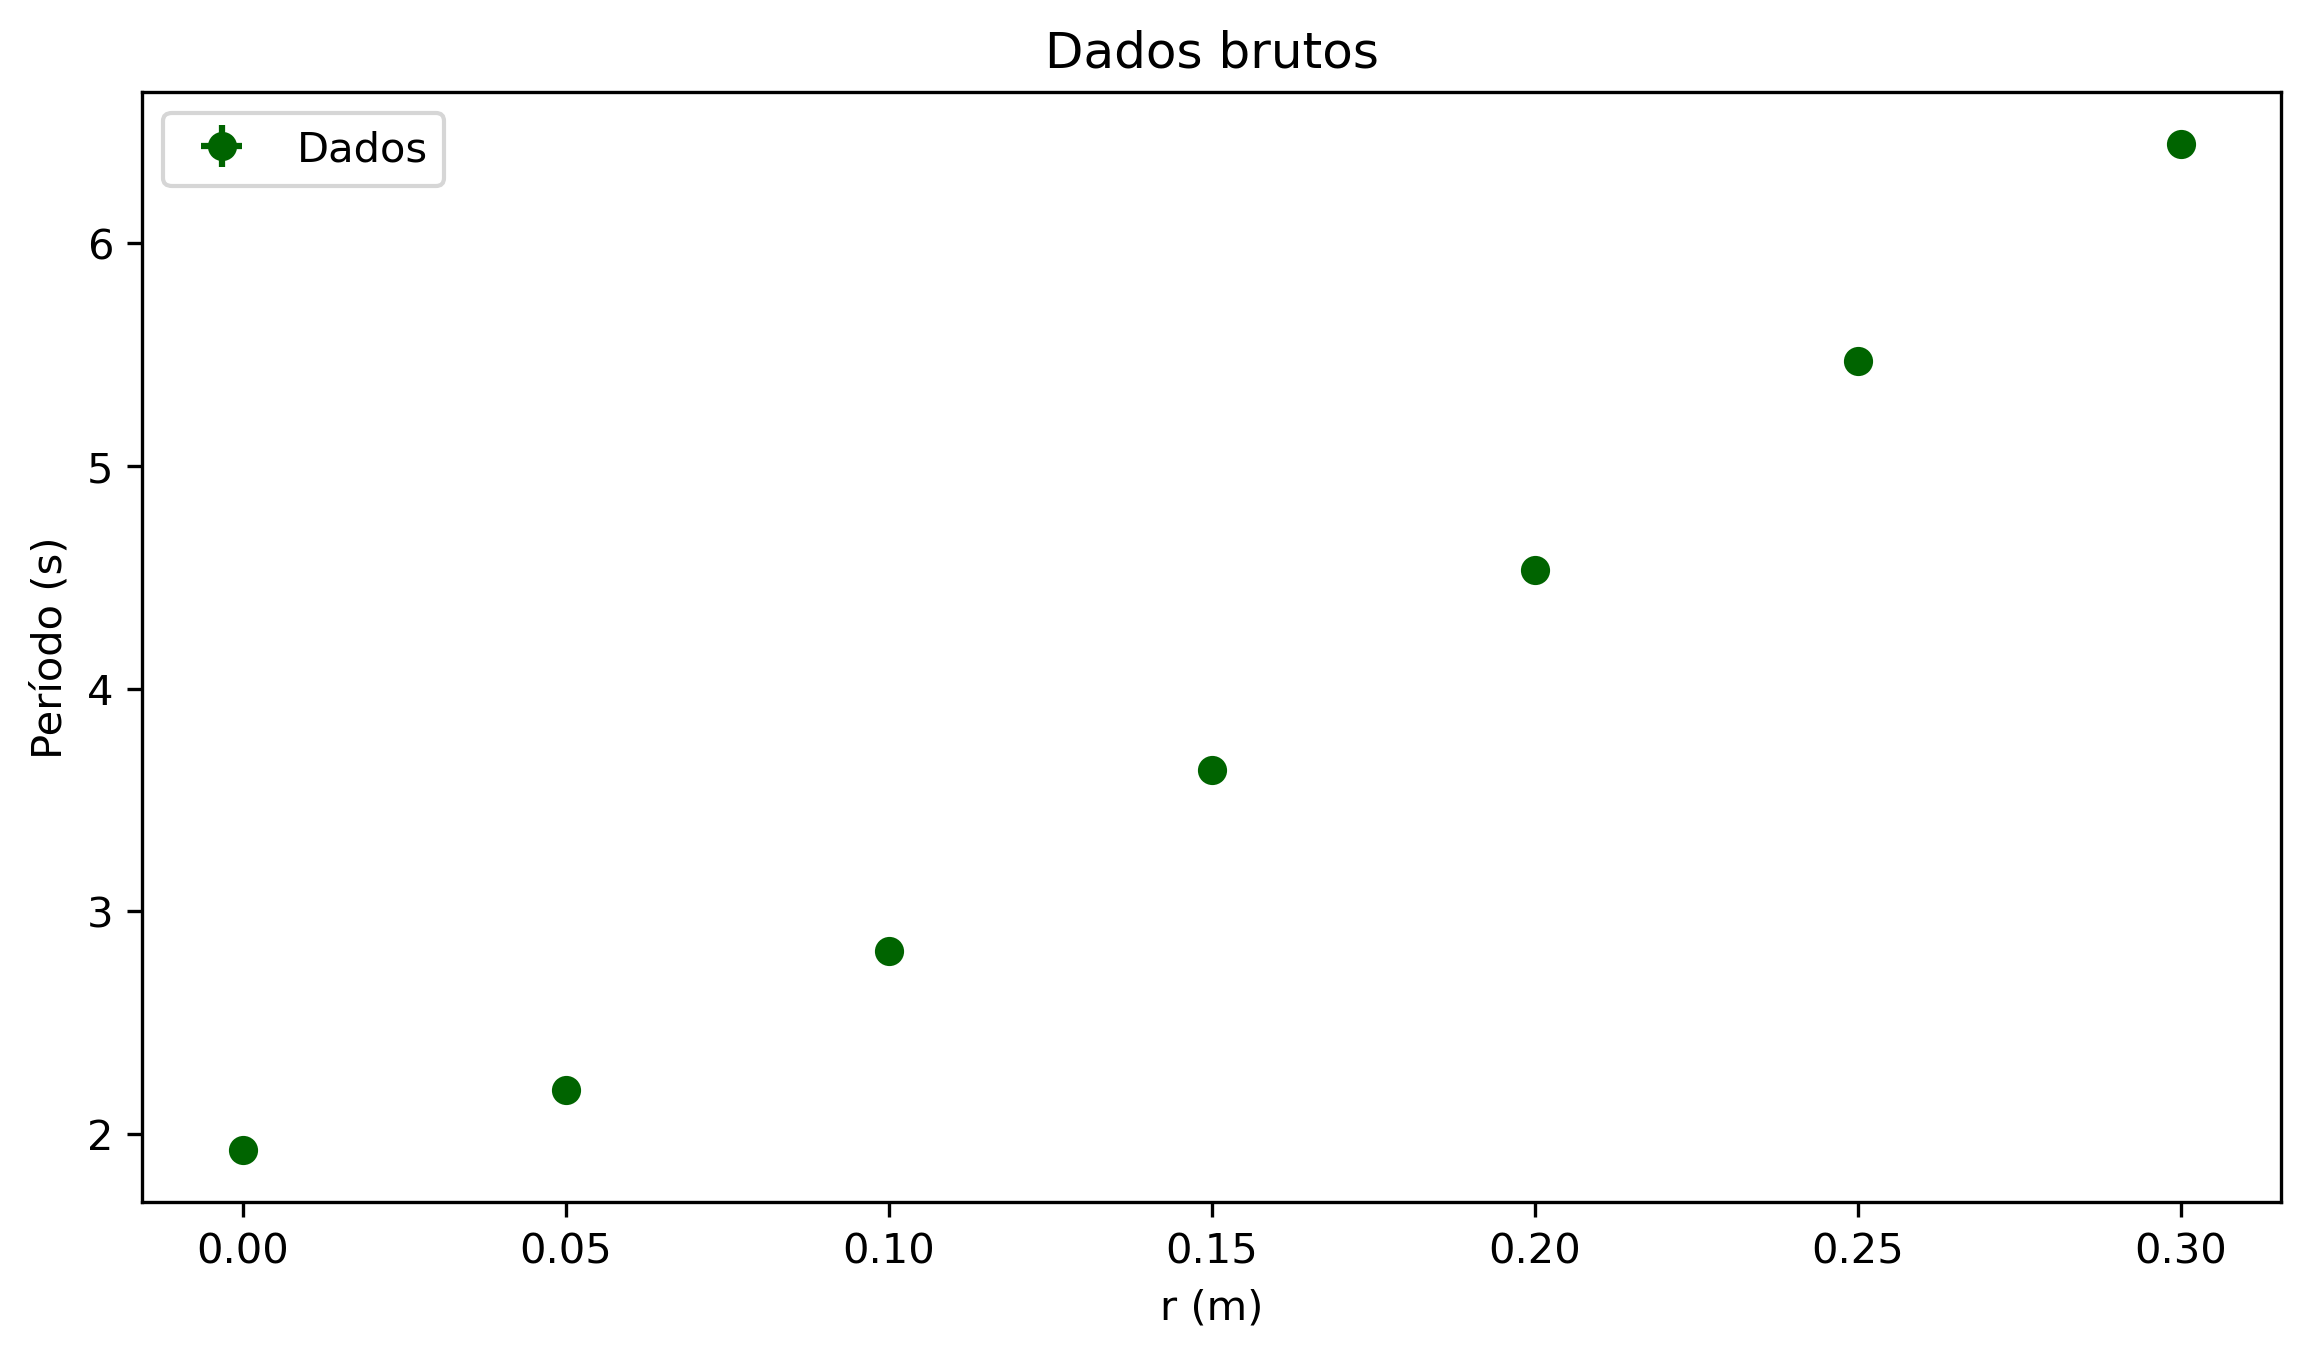

In [7]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(dist,t_mean,inc_t_mean,np.full(len(dist),inc_dist), 'o', color = 'darkgreen', label = 'Dados')
plt.xlabel('r (m)')
plt.ylabel(r'Período (s)')
plt.title('Dados brutos')
plt.legend()
plt.savefig('TxR_brutos.pdf', dpi =300)
plt.show()

## Linearização dos dados

Pelo gráfico dos dados brutos, nós vemos que $T$ e $r$ não são lineares. No entanto, nosso modelo teórico diz que $T^2$ e $r^2$ devem apresentar um comportamento linear. Portanto, vamos verificar isso fazendo um plot dessas grandezas. Lembrando que a incerteza de uma grandeza $x$ se propaga para $y = x^2$ da seguinte forma:

$$\sigma_{y} = \sqrt{\left(\sigma_x \frac{dy}{dx}\right)^2} = \bigg|\sigma_x \frac{d}{dx}x^2\bigg| = 2\sigma_x|x|$$



In [8]:
#Calculando o período ao quadrado e sua incerteza

t_square = np.power(t_mean,2)
inc_t_square = 2*np.multiply(t_mean, inc_t_mean)
#Arredondando a incerteza
inc_t_square = [float('{:g}'.format(float('{:.1g}'.format(i)))) for i in inc_t_square]
#Arredondando t_square segundo a incerteza
for i,k in enumerate(inc_t_square):
    casas = str(k)[::-1].find('.')
    t_square[i] = np.round(t_square[i],casas)

print(t_square)
print(inc_t_square)

[41.55 29.94 20.56 13.21  7.96  4.82  3.71]
[0.08, 0.08, 0.05, 0.04, 0.04, 0.02, 0.02]


In [9]:
#Calculando a distância ao quadrado e sua incerteza:

r_square = np.power(dist,2)
inc_r_square = 2*inc_dist*np.array(dist)

#Arredondando a incerteza:
inc_r_square = np.array([float('{:g}'.format(float('{:.1g}'.format(i)))) for i in inc_r_square])


print(r_square)
print(inc_r_square)

[0.09   0.0625 0.04   0.0225 0.01   0.0025 0.    ]
[3.e-04 3.e-04 2.e-04 1.e-04 1.e-04 5.e-05 0.e+00]


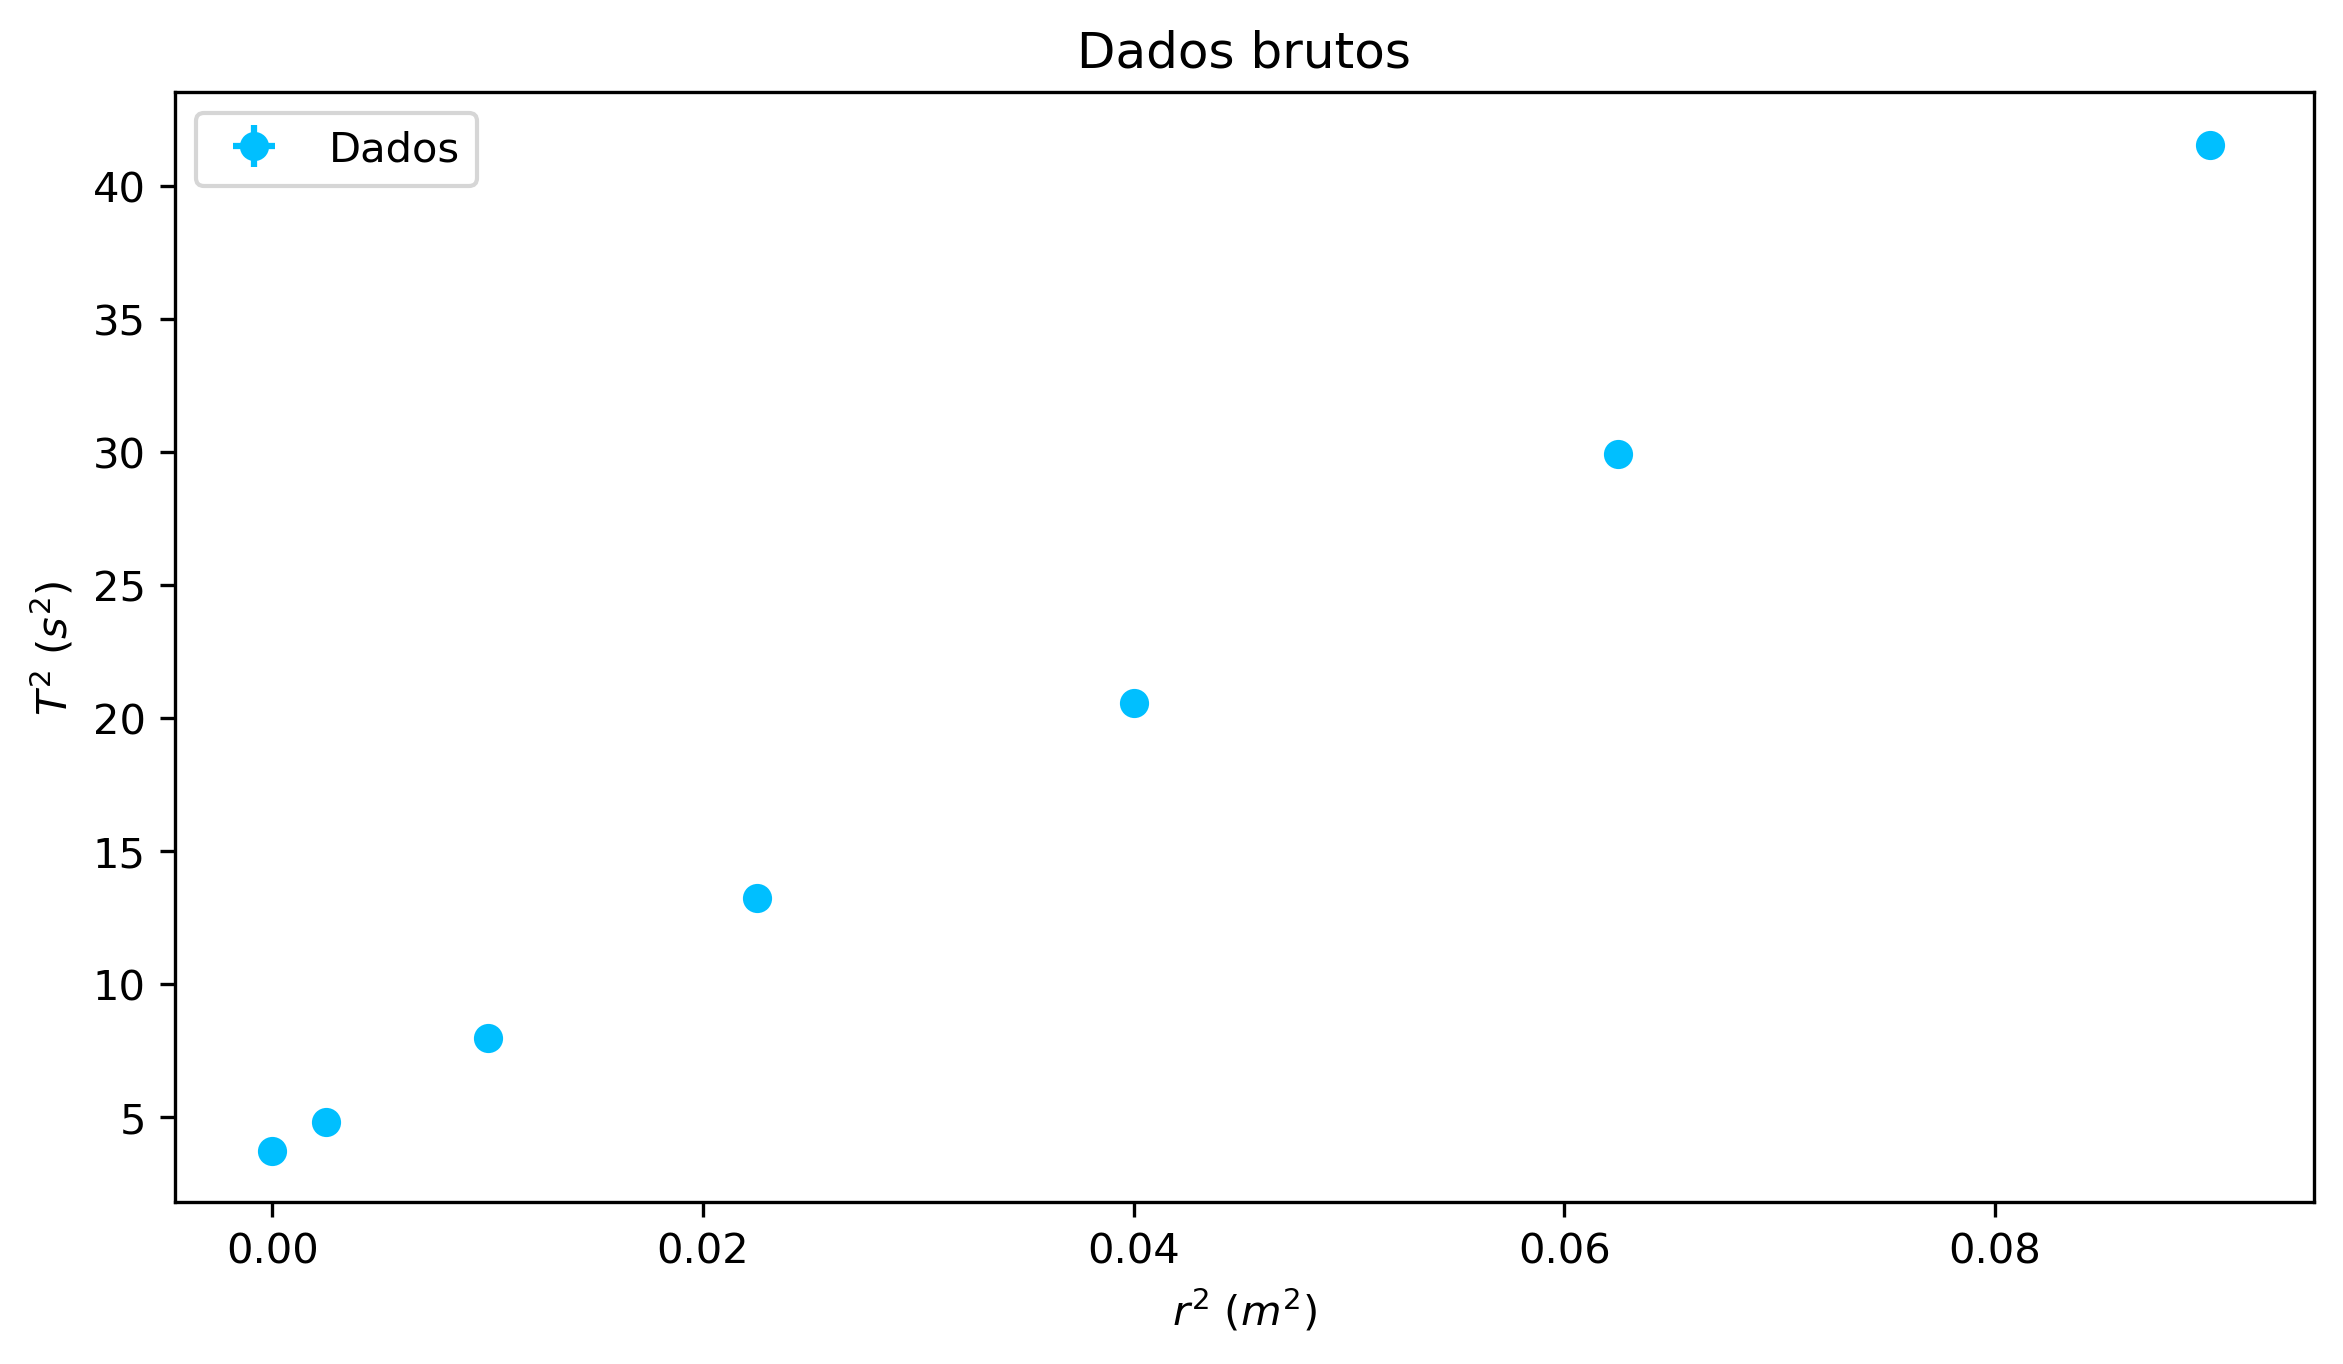

In [10]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(r_square,t_square,inc_t_square,inc_r_square, 'o', color = 'deepskyblue', label = 'Dados')
plt.xlabel(r'$r^2$ ($m^2$)')
plt.ylabel(r'$T^2$ ($s^2$)')
plt.title('Dados brutos')
plt.legend()
plt.savefig('T2xR2_brutos.pdf', dpi =300)
plt.show()

Aqui vemos que realmente temos um compotamento linear entre $T^2$ e $r^2$. Portanto, queremos ajustar uma reta:

$$T^2 = a_1 r^2 + b_1$$

## Transferência de incerteza

Nosso modelo teórico nos diz que:

$$T^2 =  4\pi^2 \frac{(m_1 + m_2)r^2}{D} + T_0^2$$

Como somente $r^2$ varia, então a transferência de incerteza é dada por:

$$\sigma'_{T^2} = \sqrt{\sigma_{T^2} + \left(\sigma_{r^2}\frac{dT^2}{dr^2}\right)^2}$$

Aqui $\frac{dT^2}{dr^2}$ pode ser aproximado como o coeficiente angular da reta ajustada sobre os dados brutos.

In [11]:
#Realizando o fit sobre os dados brutos:

fit = np.polyfit(r_square, t_square,1)

#Calculando a transferência de incerteza:
inc_t_square_transf = np.sqrt(np.power(inc_t_square,2) + np.power(inc_r_square*fit[0],2))

#Considerando apenas um algarismo significativo na incerteza:
inc_t_square_transf = np.array([float('{:g}'.format(float('{:.1g}'.format(i)))) for i in inc_t_square_transf])
print(inc_t_square_transf)

[0.1  0.1  0.1  0.06 0.06 0.03 0.02]


## Calculando o ajuste através do método dos mínimos quadrados:

In [12]:
fitpars, cov_pars = np.polyfit(r_square,t_square,1,w=np.power(inc_t_square_transf,-1),cov='True')
poly1d_fn = np.poly1d(fitpars) 
#print(fitpars, cov_pars)

#Coeficientes da reta ajustada:
coef_angular1 = fitpars[0]
coef_linear1 = fitpars[1]
sigma_angular1 = np.sqrt(cov_pars[0][0])
sigma_linear1 = np.sqrt(cov_pars[1][1])


#Considerando apenas um algarismo significativo na incerteza:
sigma_angular1 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular1))))
sigma_linear1 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear1))))

                     
print('Coeficiente angular: %.1f +- %.2f (s^2/m^2)' % (coef_angular1 ,sigma_angular1))
print('Coeficiente linear: %.2f +- %.2f (s^2)' %(coef_linear1,sigma_linear1))

Coeficiente angular: 420.3 +- 0.70 (s^2/m^2)
Coeficiente linear: 3.73 +- 0.01 (s^2)


## Gráfico do ajuste

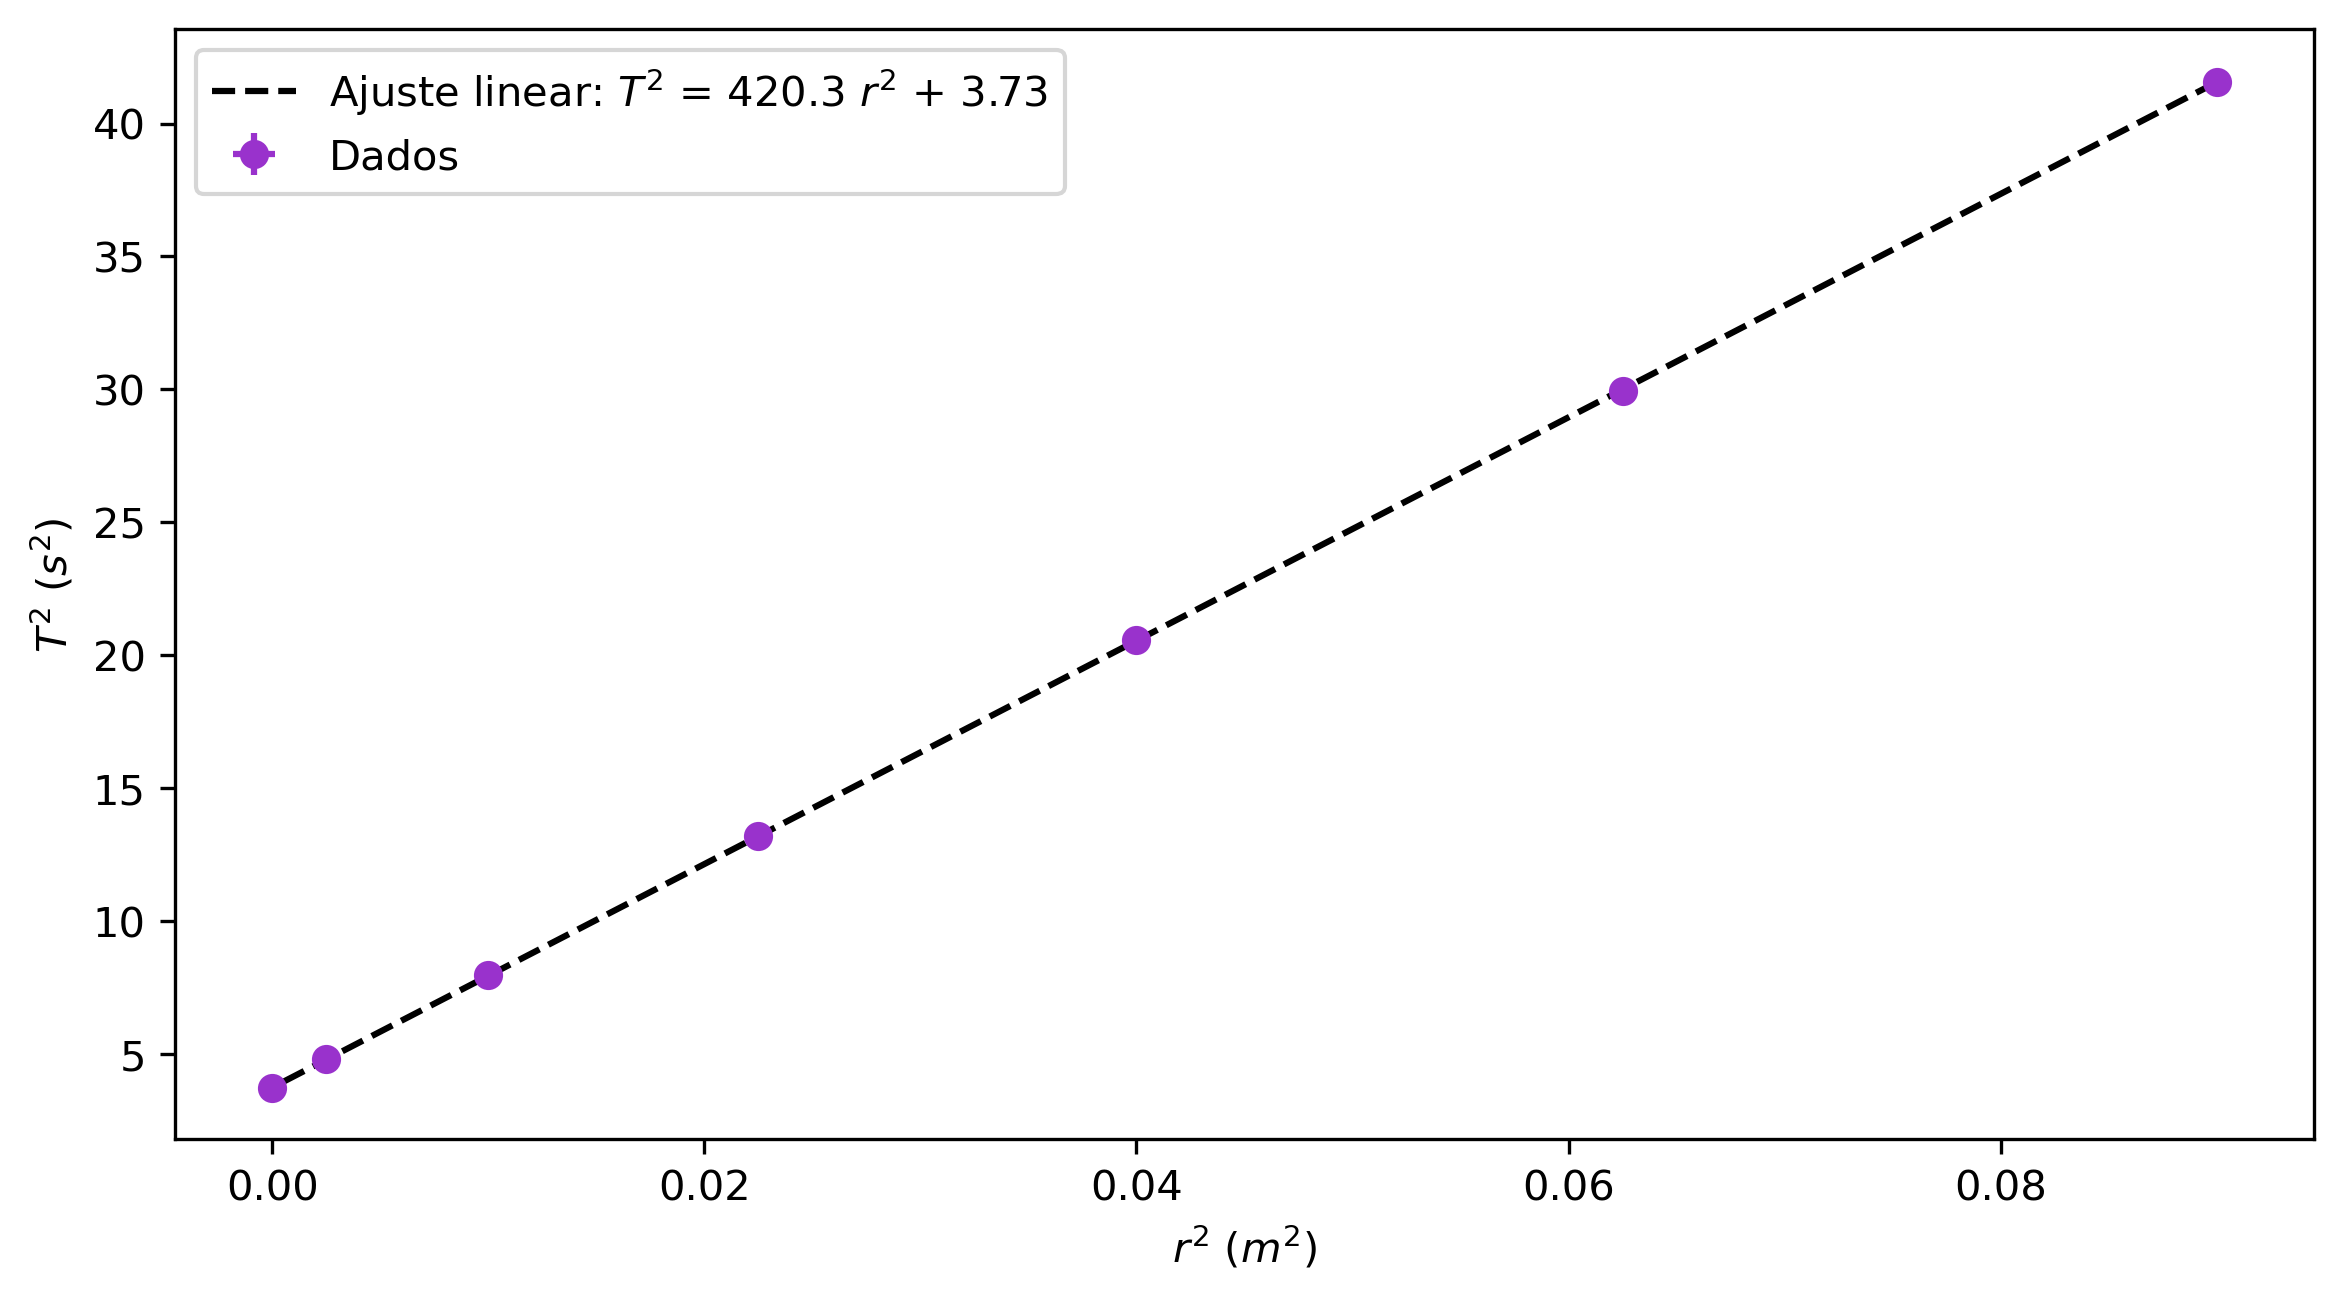

In [13]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(r_square,t_square,inc_t_square_transf,0, 'o', color = 'darkorchid', label = 'Dados')
plt.plot(r_square,r_square*coef_angular1 + coef_linear1, color ='black', ls = '--', label = r'Ajuste linear: $T^2$ = %.1f $r^2$ + %.2f' % (coef_angular1,abs(coef_linear1)))
plt.xlabel(r'$r^2$ ($m^2$)')
plt.ylabel(r'$T^2$ ($s^2$)')
plt.legend()
plt.savefig('T2xR2_ajuste.pdf', dpi =300)
plt.show()

## Interpretando os coeficientes

Nosso modelo teórico nos diz que:

$$T^2 =  4\pi^2 \frac{(m_1 + m_2)r^2}{D} + T_0^2$$

Se compararmos com o nosso ajuste $T^2 = a_1 r^2 + b_1$, veremos que:

$$a_1 = 4\pi^2 \frac{(m_1 + m_2)}{D}$$

$$b_1 = T_0^2$$

Como nós estamos interessados no torque restaurador $D$, vamos isolá-lo na primeira equação:

$$D = 4\pi^2 \frac{(m_1 + m_2)}{a_1}$$

Substituindo $m_1 = 0.23538$ kg, $m_2 = 0.23588$ kg e $a_1 = 420.3$ s^2/m^2:


$$D = 4\pi^2 \frac{(0.23538 + 235.88)}{420.3}$$


In [14]:
d = np.power(2*np.pi,2)*(m_1+m_2)/420.3
print('D = ', d, 'Nm')
print('%.5f' % d)

D =  0.044265046586318066 Nm
0.04427



A incerteza de $D$ pode ser obtida através da propagação das incertezas de $m_1$, $m_2$ e $a_1$:

$$\sigma_D = \sqrt{\left(\frac{\partial D}{\partial m_1}\right)^2\sigma_{m_1}^2 + \left(\frac{\partial D}{\partial m_2}\right)^2\sigma_{m_2}^2 + \left(\frac{\partial D}{\partial a_1}\right)^2\sigma_{a_1}^2}$$

Substituindo a expressão de D:

$$\sigma_D = \sqrt{\left(\frac{\partial D}{\partial m_1}\right)^2\sigma_{m_1}^2 + \left(\frac{\partial D}{\partial m_2}\right)^2\sigma_{m_2}^2 + \left(\frac{\partial D}{\partial a_1}\right)^2\sigma_{a_1}^2}$$

$$\sigma_D = 2\pi\sqrt{\left(\frac{\partial \frac{(m_1 + m_2)}{a_1}}{\partial m_1}\right)^2\sigma_{m_1}^2 + \left(\frac{\partial \frac{(m_1 + m_2)}{a_1}}{\partial m_2}\right)^2\sigma_{m_2}^2 + \left(\frac{\partial \frac{(m_1 + m_2)}{a_1}}{\partial a_1}\right)^2\sigma_{a_1}^2}$$

Como as incertezas das massas são as mesmas:

$$\sigma_D = 4\pi\sqrt{2\left(\frac{1}{a_1}\right)^2\sigma_{m}^2 + \left( \frac{(m_1 + m_2)}{a_1^2}\right)^2\sigma_{a_1}^2}$$

Substituindo que $m_1 = 0.23538$ kg, $m_2 = 0.23588$ kg, $a_1 = 420.3$ s^2/m^2, $\sigma_m = 10^{-5}$ kg e $\sigma_{a_1}=0.7$ s^2/m^2:

$$\sigma_D = 2\pi\sqrt{2\left(\frac{1}{420.3}\right)^2 (10^{-5})^2 + \left( \frac{(0.23538 + 0.23588)}{(420)^2}\right)^2(1)^2}$$

In [15]:
sigma_d = 2*np.pi*np.sqrt(2*np.power(1e-5/420.3,2) + np.power((0.23538 + 0.23588)/(420.3**2),2))
sigma_d = float('{:g}'.format(float('{:.1g}'.format(sigma_d))))
print(sigma_d)
print('%.5f' % sigma_d)


2e-05
0.00002


Assim vemos que:

$$D = (4.427 \pm 0.002 ) \ (10^{-2} Nm)$$

# Parte 2

In [16]:
#Dados Coletados

m_disco = 687.51 #g
m_disco = m_disco/1000 #kg
a = np.array([0,4,8,12,16]) #cm
a = a/100 #m
t_0 = [10.54,10.43,10.44,10.47,10.44] #s
t_4 = [10.72,10.68,10.71,10.78,10.72] #s
t_8 = [11.66,11.62,11.53,11.63,11.69] #s
t_12= [13.34,13.31,13.25,13.82,13.75] #s
t_16= [15.82,15.84,15.81,15.87,15.90] #s

t_aux2 = [t_0,t_4,t_8,t_12,t_16]


In [17]:
# Incertezas:
inc_massa = 0.01 #g
#inc_a = 0.05 #cm
inc_a = 0.05/100 #m
inc_cronometro = 0.01/2 #s

## Calculando o período e sua incerteza:

Fazendo a média dos dados obtidos para cada valor de $a$ e depois dividindo por três nós encontraremos o período. A sua incerteza será por:

$$\sigma_T = \sqrt{\sigma_{desvpad}^2 + \sigma_{cronometro}^2}$$

Onde:

$$\sigma_{desvpad} = \sqrt{\frac{\sum_{i=1}^{N}T_i - \bar{T}}{N(N-1)}}$$

In [18]:
t_mean2 = []
inc_t_mean2 = []
for j in t_aux2:
    #Calculando o período médio
    t_mean2.append(np.mean(j)/3)
    
    #Calculando a incerteza via desvio padrão
    inc_t2 = (np.std(j)/(np.sqrt(len(j)-1)))/3
    #Calculando a incerteza considerando também a incerteza do cronômetro:
    inc_t2 = np.sqrt(np.power(inc_t2,2) + np.power(inc_cronometro,2))
    #Arredondando a incerteza
    inc_t2 = float('{:g}'.format(float('{:.1g}'.format(inc_t2))))
    inc_t_mean2.append(inc_t2)

print(t_mean2)
print(inc_t_mean2)

[3.4879999999999995, 3.574, 3.8753333333333337, 4.498, 5.282666666666667]
[0.008, 0.007, 0.01, 0.04, 0.007]


In [19]:
#Arredondando o período segundo a incerteza:
for i,k in enumerate(inc_t_mean2):
    casas = str(k)[::-1].find('.')
    t_mean2[i] = np.round(t_mean2[i],casas)

print(t_mean2)

[3.488, 3.574, 3.88, 4.5, 5.283]


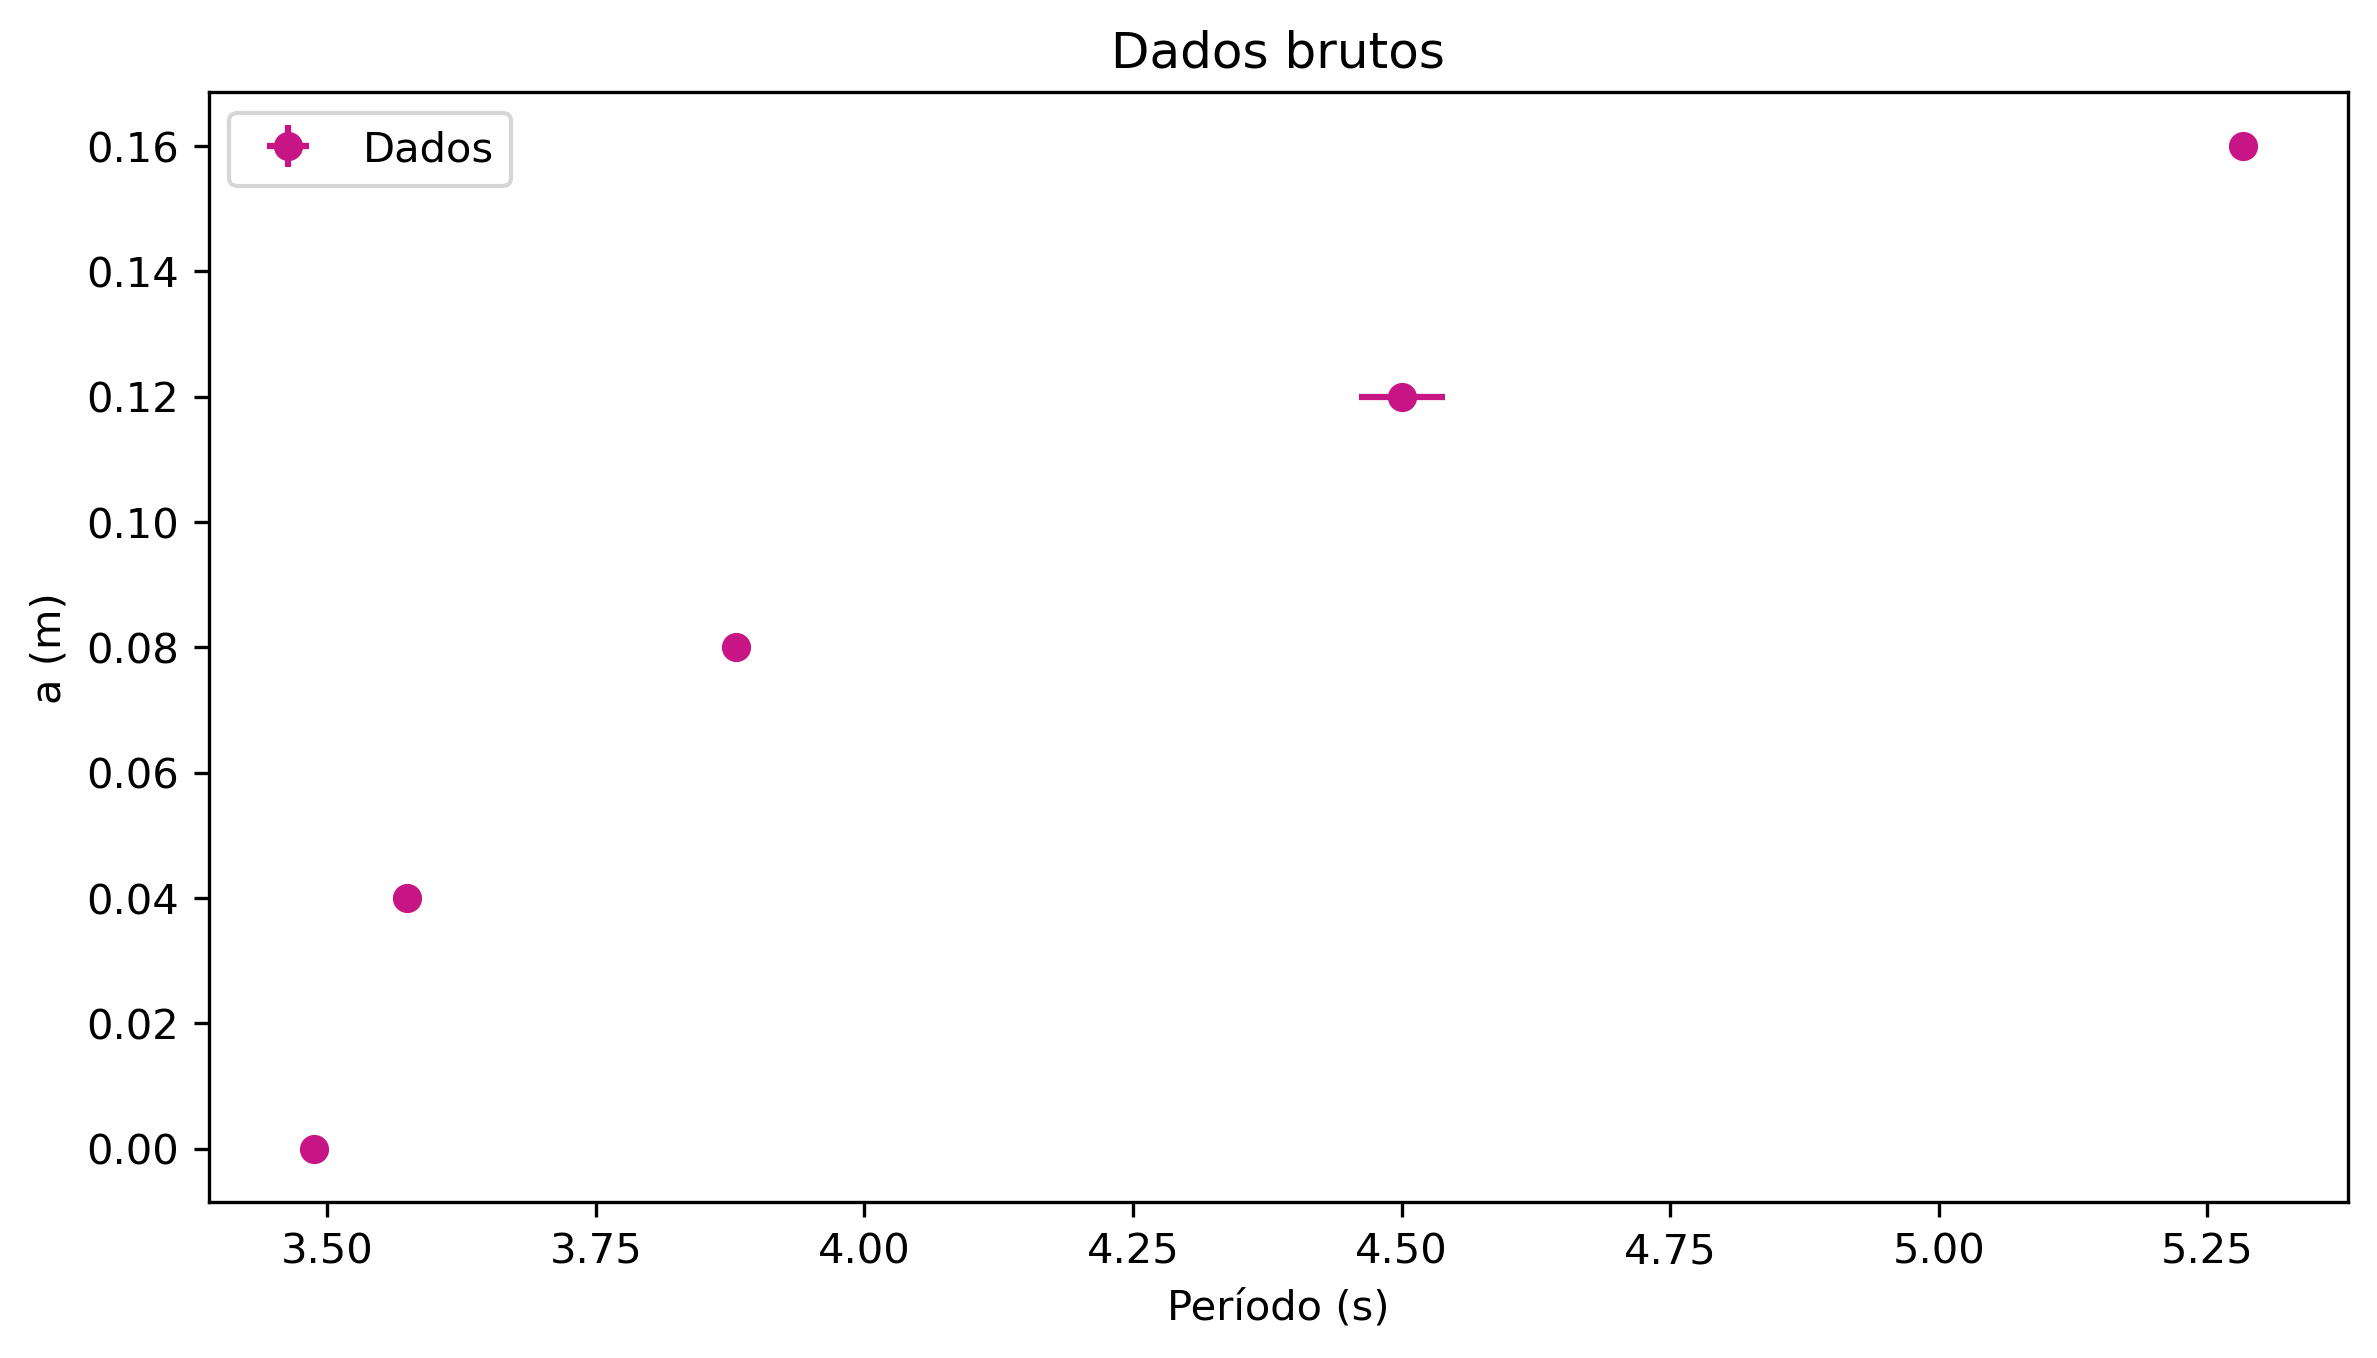

In [20]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_mean2,a,np.full(len(a),inc_a),inc_t_mean2, 'o', color = 'mediumvioletred', label = 'Dados')
plt.ylabel('a (m)')
plt.xlabel(r'Período (s)')
plt.title('Dados brutos')
plt.legend()
plt.savefig('axT_brutos.pdf', dpi =300)
plt.show()

Nós sabemos que em oscilações rotacionais, o período de um corpo com momento de inércia $I$ é dado por:

$$T = 2\pi\sqrt{\frac{I}{D}} \implies T^2 = 4\pi^2 \frac{I_{disco}}{D}$$

$$I_{disco} = \frac{D}{4\pi^2}T^2$$

Pelo teorema de Stainer:

$$I_{disco} = M a^2 + I_{CM}$$

Onde $a$ é a distância em relação ao centro do disco. Substituindo isto na primeira expressão de $I_{disco}$:

$$M a^2 + I_{CM} = \frac{D}{4\pi^2}T^2$$

$$M a^2  = \frac{D}{4\pi^2}T^2 - I_{CM}$$

## Calculando $M a^2$ e sua incerteza

A incerteza de $M a^2$ pode ser obtida através da propagação de incerteza da massa e da medida $a$:

$$\sigma_{M a^2} = \sqrt{\left(\frac{\partial M a^2}{\partial M}\right)^2\sigma_M^2 +  \left(\frac{\partial M a^2}{\partial a}\right)^2\sigma_a^2 }$$
$$\sigma_{M a^2} = \sqrt{ a^4\sigma_M^2 +   4M^2 a^2 \sigma_a^2 }$$
$$\sigma_{M a^2} = a\sqrt{a^2 \sigma_M^2 +   4M^2 \sigma_a^2 }$$

In [21]:
#Calculando Ma^2
m_a_square = m_disco*np.power(a,2)

#Calculando a incerteza de $Ma^2$
inc_ma_square = np.sqrt(np.power(np.array(a)*inc_massa,2) + np.power(2*m_disco*np.full(len(a),inc_a),2))
#Arredondando a incerteza
inc_ma_square = [float('{:g}'.format(float('{:.1g}'.format(i)))) for i in inc_ma_square ]



#Arredondando o $Ma^2$ segundo sua incerteza:
for i,k in enumerate(inc_ma_square):
    casas = str(k)[::-1].find('.')
    m_a_square[i] = np.round(m_a_square[i],casas)


print(m_a_square)
print(inc_ma_square)


[0.     0.0011 0.004  0.01   0.018 ]
[0.0007, 0.0008, 0.001, 0.001, 0.002]


## Calculando o período ao quadrado e sua incerteza:

Aqui o procedimento é análogo a parte 1

In [22]:
#Calculando o período ao quadrado e sua incerteza

t_square2 = np.power(t_mean2,2)
inc_t_square2 = 2*np.multiply(t_mean2, inc_t_mean2)
#Arredondando a incerteza
inc_t_square2 = np.array([float('{:g}'.format(float('{:.1g}'.format(i)))) for i in inc_t_square2])
                         
#Arredondando t_square segundo a incerteza
for i,k in enumerate(inc_t_square2):
    casas = str(k)[::-1].find('.')
    t_square2[i] = np.round(t_square2[i],casas)

print(t_square2)
print(inc_t_square2)

[12.17 12.77 15.05 20.2  27.91]
[0.06 0.05 0.08 0.4  0.07]


## Gráfico $Ma^2$ x $T^2$:

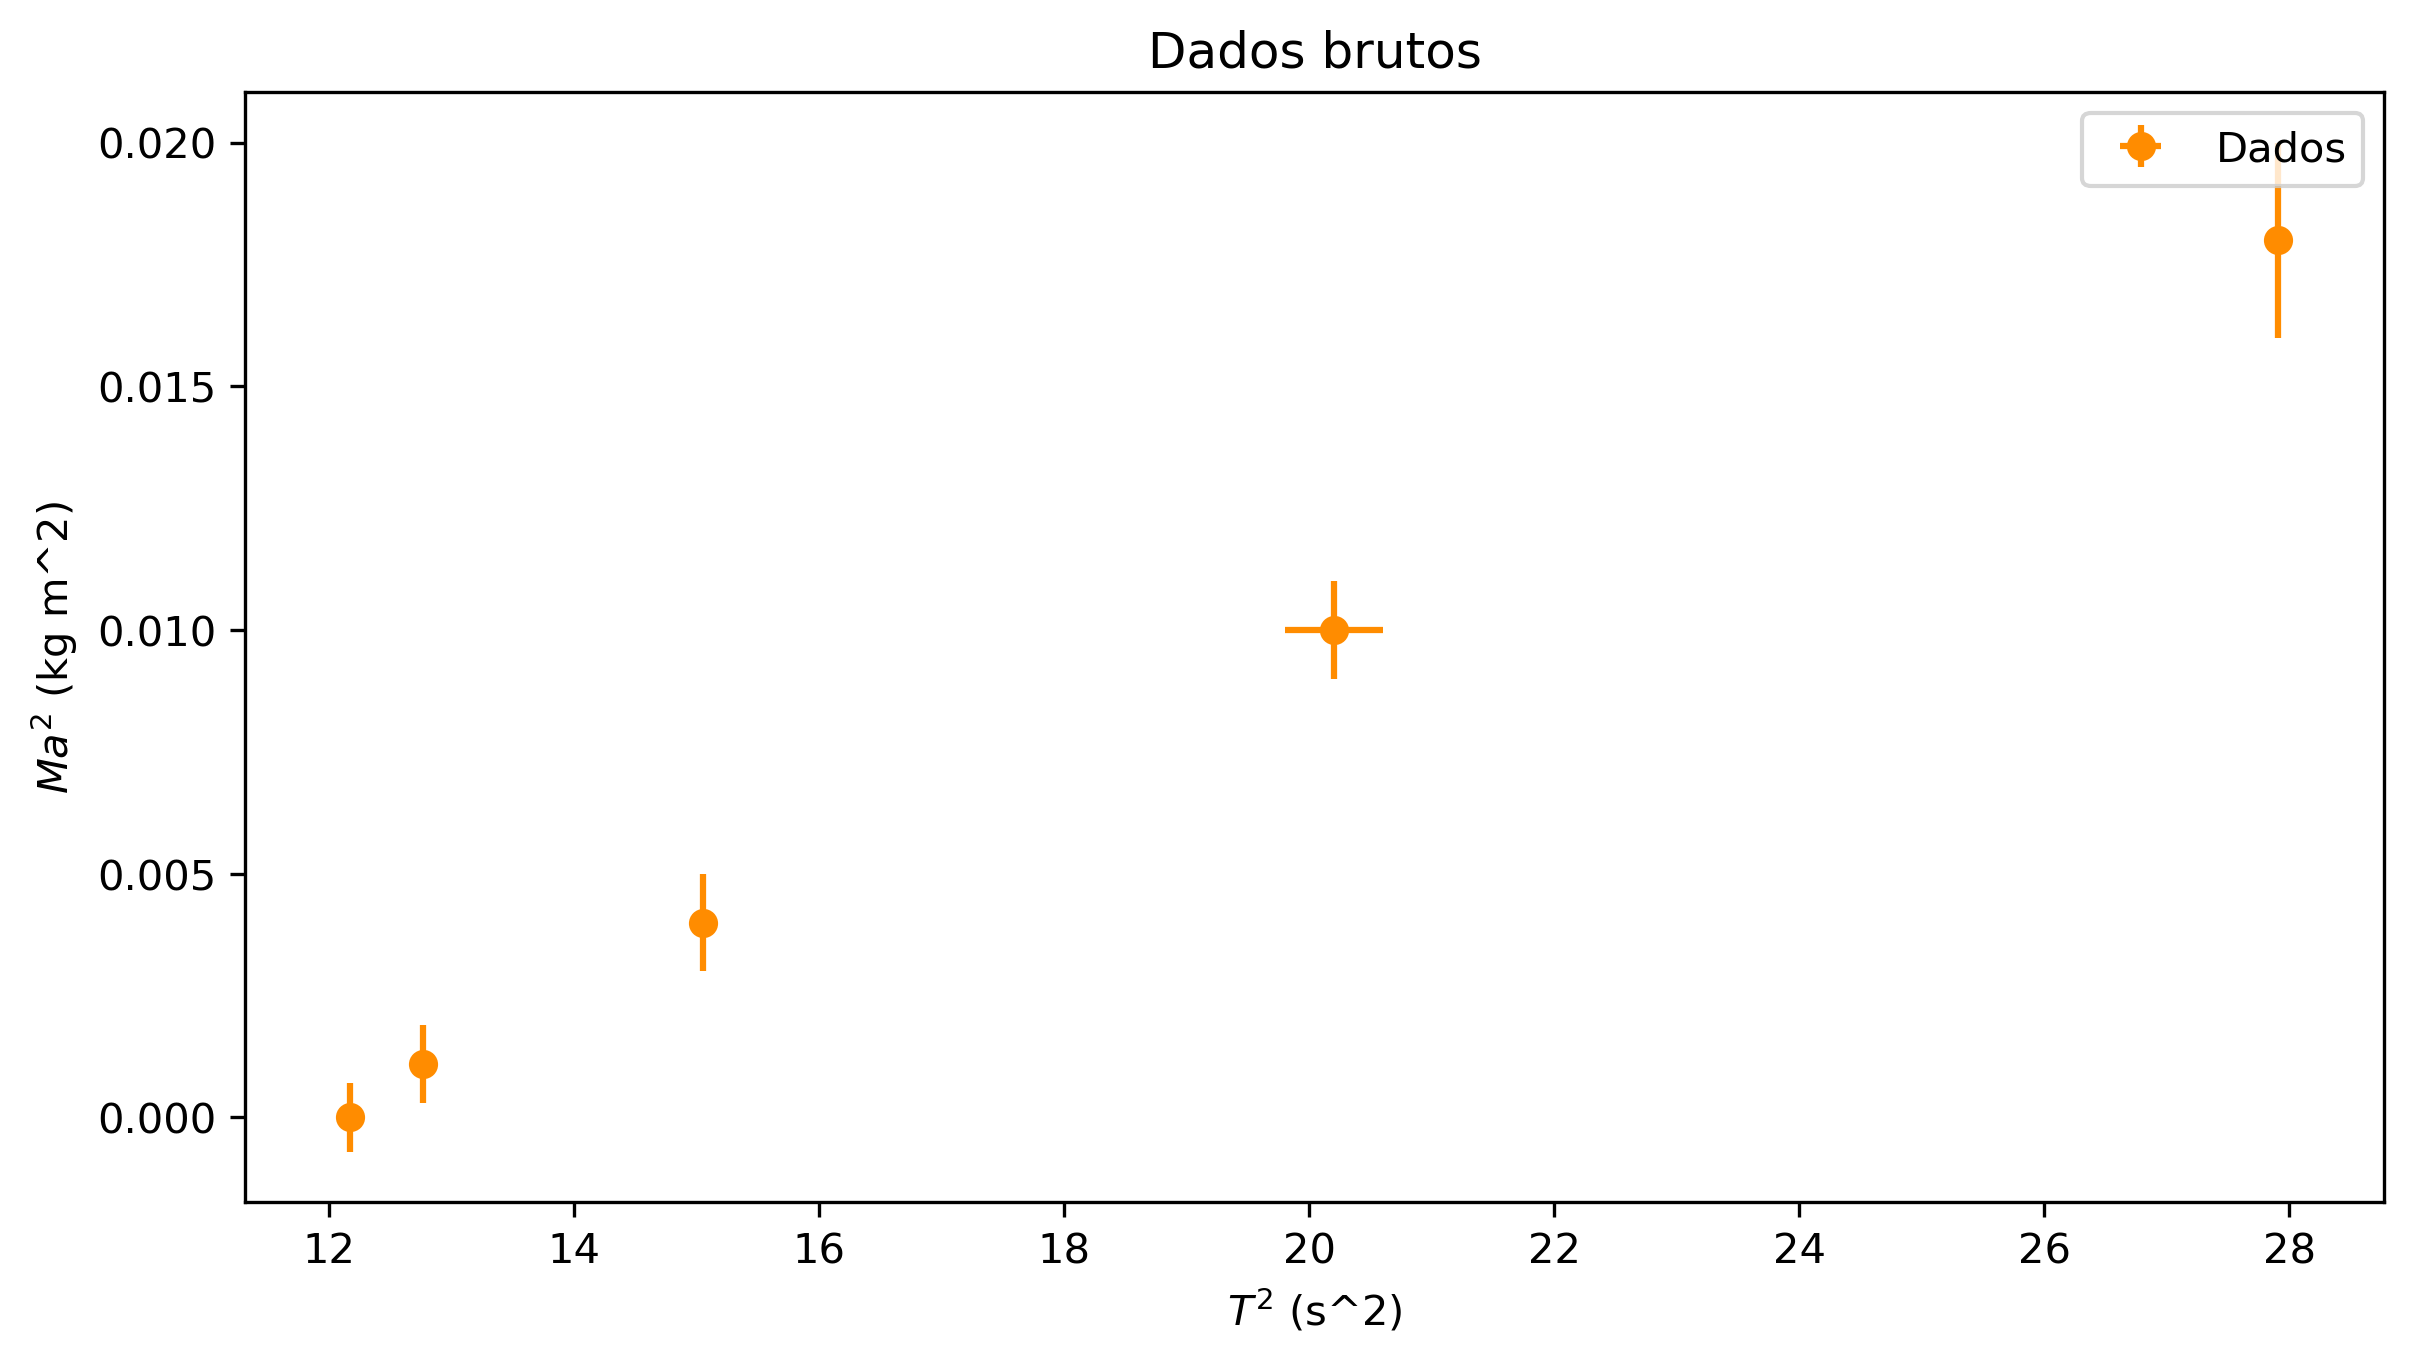

In [23]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_square2,m_a_square,inc_ma_square,inc_t_square2, 'o', color = 'darkorange', label = 'Dados')
plt.ylabel(r'$Ma^2$ (kg m^2)')
plt.xlabel(r'$T^2$ (s^2)')
plt.title('Dados brutos')
plt.legend()
plt.savefig('Ma2xT2_brutos.pdf', dpi =300)
plt.show()

## Transferência de incerteza:

Nosso modelo teórico diz que:

$$M a^2  = \frac{D}{4\pi^2}T^2 - I_{CM}$$

Como $Ma^2$ varia somente em relação a $T^2$, a transferência de incerteza será dada por:


$$\sigma'_{Ma^2} = \sqrt{\sigma_{Ma^2} + \left(\sigma_{T^2}\frac{dMa^2}{dT^2}\right)^2}$$

Aqui $\frac{dMa^2}{dT^2}$ pode ser aproximado como o coeficiente angular da reta ajustada sobre os dados brutos.


In [24]:
#Realizando o fit sobre os dados brutos:

fit2 = np.polyfit(t_square2, m_a_square,1)

#Calculando a transferência de incerteza:
inc_ma_square_transf = np.sqrt(np.power(inc_ma_square,2) + np.power(inc_t_square2*fit2[0],2))

#Considerando apenas um algarismo significativo na incerteza:
inc_ma_square_transf = np.array([float('{:g}'.format(float('{:.1g}'.format(i)))) for i in inc_ma_square_transf])
print(inc_ma_square_transf)

[0.0007 0.0008 0.001  0.001  0.002 ]


## Calculando o ajuste através do método MMQ:

In [25]:
fitpars2, cov_pars2 = np.polyfit(t_square2,m_a_square,1,w=np.power(inc_ma_square_transf,-1),cov='True')
poly1d_fn = np.poly1d(fitpars2) 
#print(fitpars, cov_pars)

#Coeficientes da reta ajustada:
coef_angular2 = fitpars2[0]
coef_linear2 = fitpars2[1]
sigma_angular2 = np.sqrt(cov_pars2[0][0])
sigma_linear2 = np.sqrt(cov_pars2[1][1])


#Considerando apenas um algarismo significativo na incerteza:
sigma_angular2 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular2))))
sigma_linear2 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear2))))

                     
print('Coeficiente angular: %.5f +- %.5f (Nm)' % (coef_angular2 ,sigma_angular2))
print('Coeficiente linear: %.4f +- %.4f (kg m^2)' %(coef_linear2,sigma_linear2))

Coeficiente angular: 0.00118 +- 0.00004 (Nm)
Coeficiente linear: -0.0140 +- 0.0007 (kg m^2)


## Gráfico do ajuste:

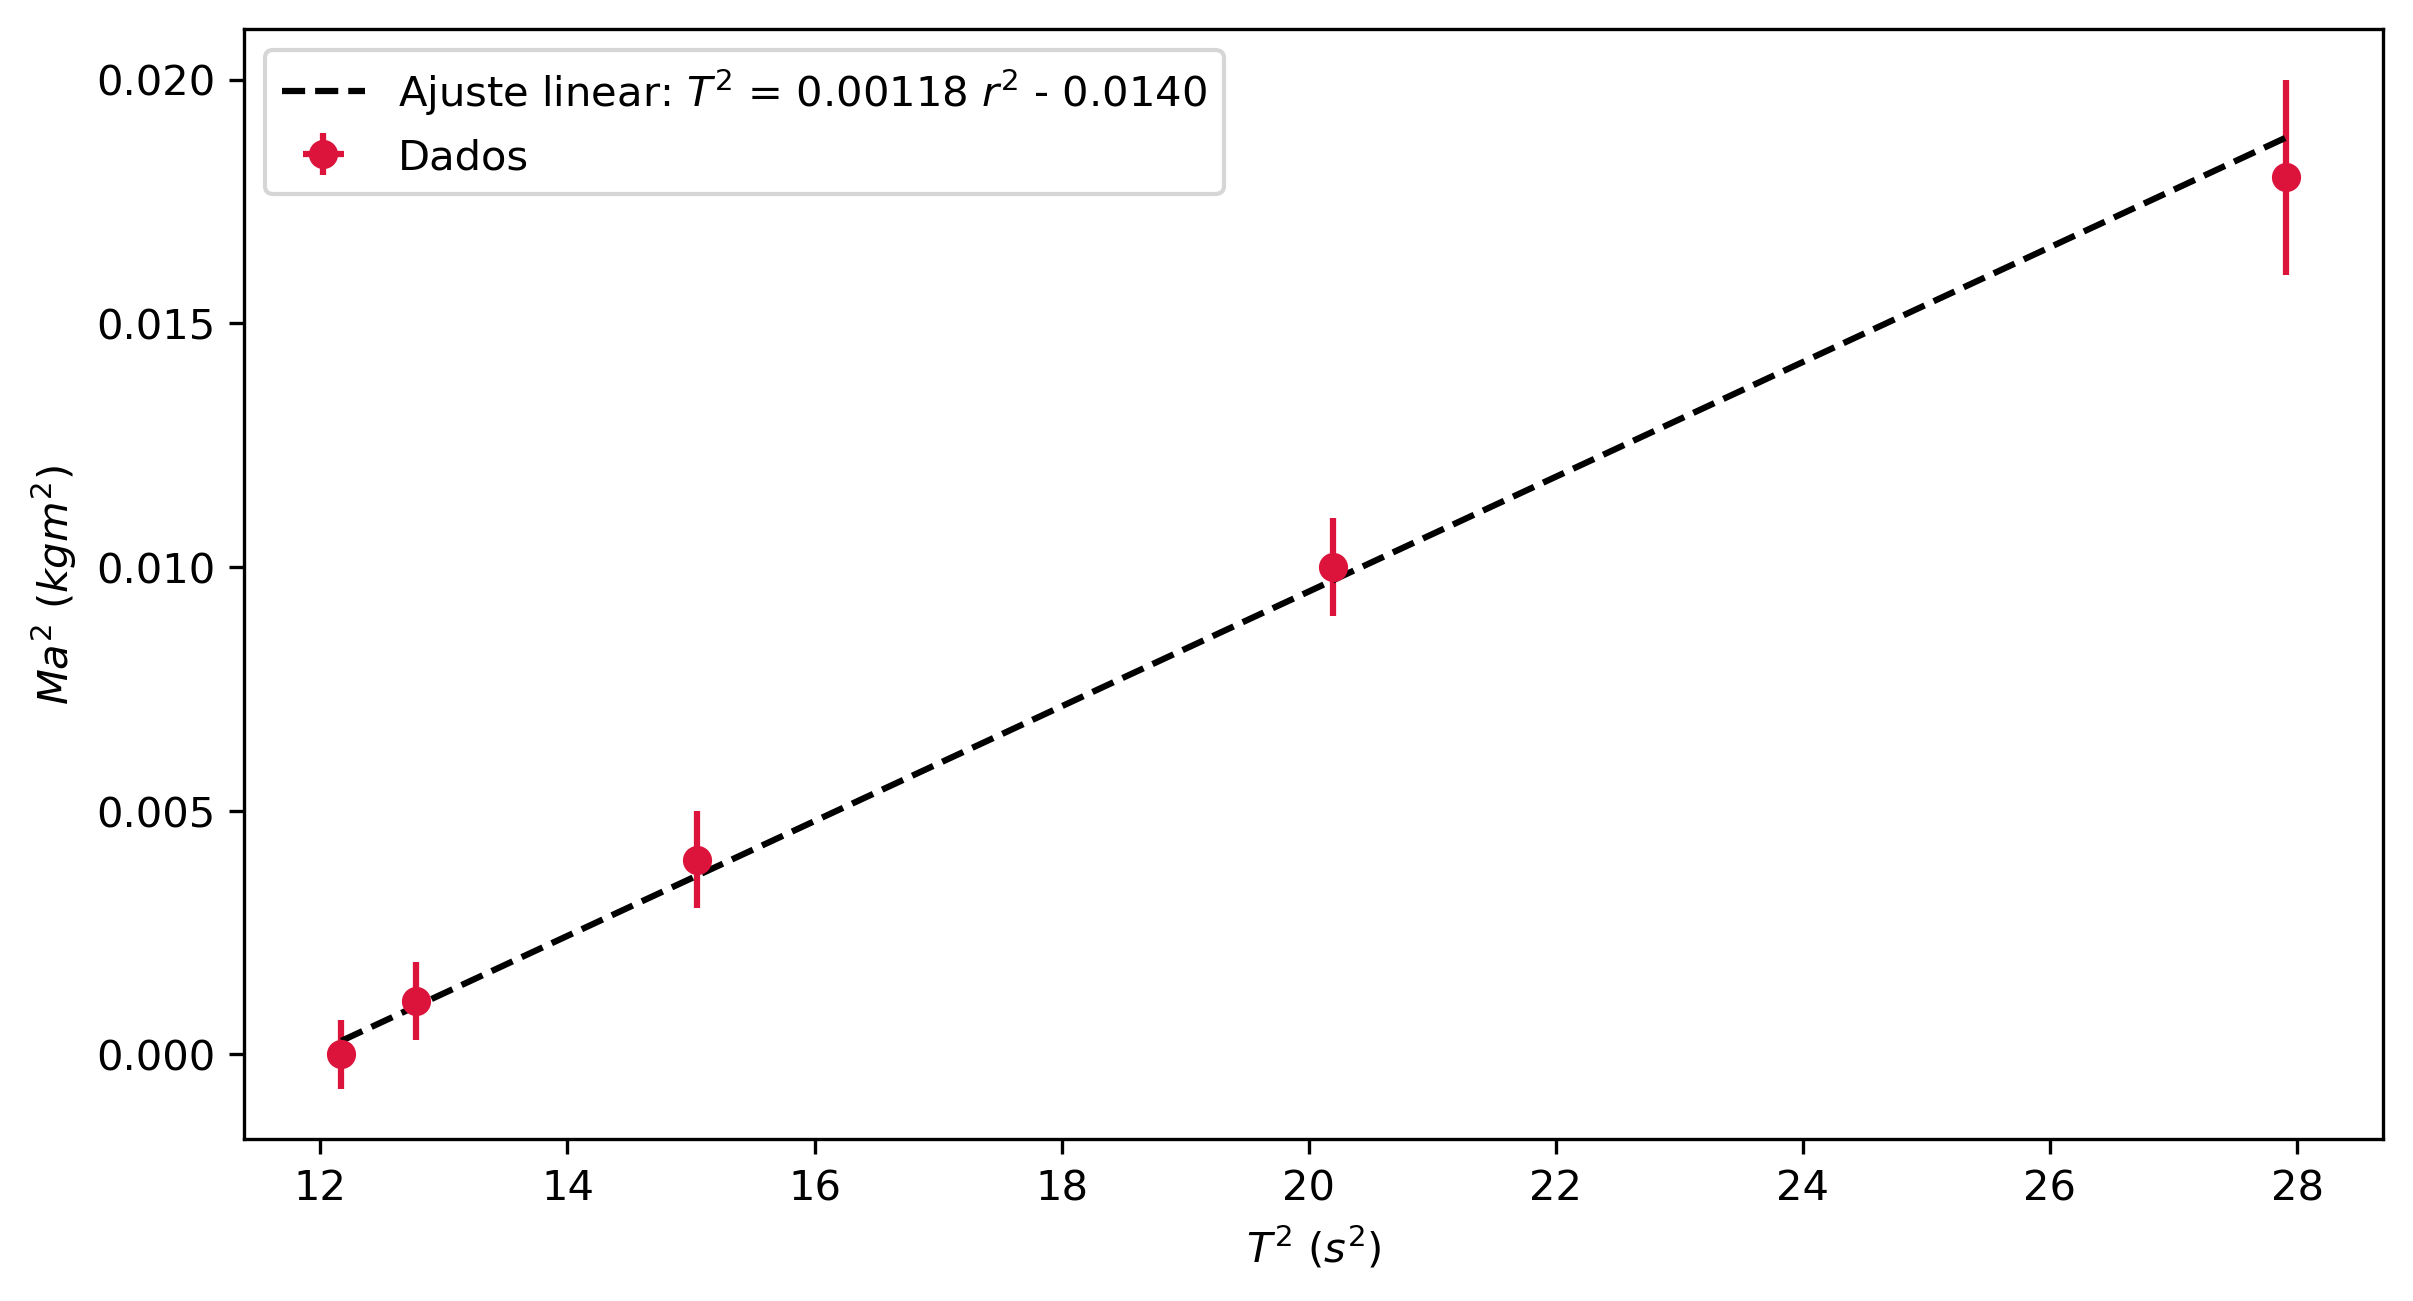

In [26]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_square2,m_a_square,inc_ma_square_transf,0, 'o', color = 'crimson', label = 'Dados')
plt.plot(t_square2,t_square2*coef_angular2 + coef_linear2, color ='black', ls = '--', label = r'Ajuste linear: $T^2$ = %.5f $r^2$ - %.4f' % (coef_angular2,abs(coef_linear2)))
plt.ylabel(r'$Ma^2$ ($kg m^2$)')
plt.xlabel(r'$T^2$ ($s^2$)')
plt.legend()
plt.savefig('Ma2xT2_ajuste.pdf', dpi =300)
plt.show()

## Interpretando os coeficientes obtidos:

Nosso modelo teórico nos diz que:

$$M a^2  = \frac{D}{4\pi^2}T^2 - I_{CM}$$

Se compararmos com o ajuste $Ma^2 = a_2 T^2 + b_2$ que fizemos, veremos que:

$$a_2 = \frac{D}{4\pi^2} \implies D = 4\pi^2 a_2$$

$$ b_2 = - I_{CM} \implies I_{CM} = -b_2$$

Nós encontramos que $a_2 = (0.00118 \pm 0.00004)$ (Nm) e $b_2 = (-0.0140 \pm 0.0007) $ (kg m^2). Logo:

$$D = 4\pi^20.00118  = 0.04658453277314177  \ (Nm)$$

$$I_{CM} = (0.0140 \pm 0.0007) \ (kg m^2)$$ 

Note que o valor teórico do momento de inércia para um eixo que passa no centro de massa do disco é dado por:

$$I_{CM t} = \frac{1}{2}M R^2$$

Como $M = 0.68751$ kg e $R = 0.2$ m:

$$I_{CM t} = 0.0137502 \ (kg m^2)$$

A sua incerteza será dada pela propagação do erro da massa e da medida do raio:

$$\sigma_{I_{CM t}} = \sqrt{\left(\frac{\partial \frac{1}{2}M R^2}{\partial M}\right)^2\sigma_{ M}^2 + \left(\frac{\partial \frac{1}{2}M R^2}{\partial R}\right)^2\sigma_{ R}^2}$$

$$\sigma_{I_{CM t}} = \sqrt{\left(\frac{1}{2} R^2\right)^2\sigma_{ M}^2 + \left( M R\right)^2\sigma_{ R}^2}$$

Como $\sigma_R  = 0.0005$ m e $\sigma_M = 0.00001$ kg

In [27]:
print("D = %.3f (Nm)" % (0.00118*4*np.power(np.pi,2)))

i_disco_teoria = 0.5*m_disco*(0.2**2)
sigma_i_disco_teoria = np.sqrt(np.power(0.5*(0.2**2)*0.00001,2) + np.power(m_disco*0.2*0.0005,2))
sigma_i_disco_teoria = float('{:g}'.format(float('{:.1g}'.format(sigma_i_disco_teoria))))
print("I_CM teorico: (%.5f +- %.5f) (kg m^2)"%(i_disco_teoria,sigma_i_disco_teoria))


D = 0.047 (Nm)
I_CM teorico: (0.01375 +- 0.00007) (kg m^2)


A incerteza de $D$ pode ser obtida através da propagação do erro de $a_2$:

$$\sigma_D = \sqrt{\left(\frac{\partial 4\pi^2 a_2}{\partial a_2}\right)^2\sigma_{a_2}^2} = 4\pi^2 \sigma_{a_2} $$

Como $\sigma_{a_2} = 0.00004$ (Nm):

$$\sigma_D =  4\pi^2 0.00004 = 0.0015791367041742975 = 0.002 \ (Nm)$$

In [28]:
print("sigma_D = %.3f (Nm)" % (0.00004*4*np.power(np.pi,2)))

sigma_D = 0.002 (Nm)


Assim:

$$D = (4.7\pm 0.2) \ (10^{-2}Nm) $$ 

## Encontrando $I_{disco}$ via experimento:

Nós sabemos que:

$$I_{disco} = \frac{D}{4\pi^2} T^2$$

A sua incerteza será:

$$\sigma_{I_{disco}} = \sqrt{\left(\frac{\partial I_{disco}}{\partial D}\right)^2\sigma_{D}^2 + \left(\frac{\partial I_{disco}}{\partial T^2}\right)^2\sigma_{T^2}^2}$$

$$\sigma_{I_{disco}} = \sqrt{\left(\frac{\partial \frac{D}{4\pi^2} T^2}{\partial D}\right)^2\sigma_{D}^2 + \left(\frac{\partial \frac{D}{4\pi^2} T^2}{\partial T^2}\right)^2\sigma_{T^2}^2}$$

$$\sigma_{I_{disco}} = \sqrt{\left( \frac{T^2}{4\pi^2} \right)^2\sigma_{D}^2 + \left( \frac{D}{4\pi^2} \right)^2\sigma_{T^2}^2}$$

In [29]:
i_disco = 0.047*np.power(2*np.pi,-2)*t_square2

sigma_i_disco = np.sqrt(np.power(np.power(2*np.pi,-2)*t_square2*0.002,2) + np.power(np.power(2*np.pi,-2)*0.047*inc_t_square2,2))
sigma_i_disco = [float('{:g}'.format(float('{:.1g}'.format(i)))) for i in sigma_i_disco]

for i,k in enumerate(sigma_i_disco):
    casas = str(k)[::-1].find('.')
    i_disco[i] = np.round(i_disco[i],casas)
print("I_disco = ",i_disco)
print("sigma_i_disco = ",sigma_i_disco)

I_disco =  [0.0145 0.0152 0.0179 0.024  0.033 ]
sigma_i_disco =  [0.0006, 0.0006, 0.0008, 0.001, 0.001]


## Encontrando $I_{disco}$ via teoria:

$$I_{disco} = M a^2 + I_{CM t} $$

Nós sabemos que a propagação de erros na soma de duas grandezas $x$ e $y$ é dada por $\sigma = \sqrt{\sigma_x^2 + \sigma_y^2}$. Logo:

$$\sigma_{I_{disco}} =  \sqrt{\sigma_{Ma^2}^2 + \sigma_{I_{CM t}}^2}$$

In [30]:

i_ds = m_a_square + np.full(len(m_a_square),i_disco_teoria)
sigma_i_ds = np.sqrt(np.power(inc_ma_square,2) + np.power(np.full(len(inc_ma_square),sigma_i_disco_teoria),2))
sigma_i_ds = [float('{:g}'.format(float('{:.1g}'.format(i)))) for i in sigma_i_ds]
print("sigma_i_disco = ",sigma_i_ds)
                        
    
for i,k in enumerate(sigma_i_ds):
    casas = str(k)[::-1].find('.')
    i_ds[i] = np.round(i_ds[i],casas)    
    
print("i_disco = ",i_ds)

sigma_i_disco =  [0.0007, 0.0008, 0.001, 0.001, 0.002]
i_disco =  [0.0138 0.0149 0.018  0.024  0.032 ]


# Parte 3

In [31]:
#Dados

#Massas
m_disk = 347.01/1000 #kg
m_S = 910.60/1000 #kg

#Raios
r_disk = 11/100 #m
r_S = (46.6/np.pi)/200 #m

#Período de 5 oscilações

t_disk = [6.90,6.94,6.91,6.84,6.87] #s
t_S = [6.65,6.72,6.66,6.65,6.63] #s

#Torque restaurador

tau_r = 0.04427 #Nm


In [32]:
#Incertezas

inc_massa = 0.01 #g
inc_r_disk = 0.05/100 #m

inc_cronometro = 0.01/2 #s

## Incerteza do raio da esfera:

Nós medimos o diâmetro da esfera de dois métodos distintos, um utilizando um barbante e medindo seu comprimento e outro medindo sua altura. Nós obtivemos uma circunferência de 46.6 cm, o que implica em um diâmetro de 14.8332407 cm no primeiro método e um diâmetro de 14.1cm no segundo. Tendo em vista esse desvio, vamos acrescentar uma incerteza além da da régua:

$$\sigma_{r_S} = \sqrt{\sigma_{regua}^2 + \sigma_{desvpad}^2}$$

In [33]:
inc_r_S = np.sqrt(np.power(0.05/100,2) + np.power(np.std([14.1/200,(46.6/np.pi)/200]),2))
inc_r_S = float('{:g}'.format(float('{:.1g}'.format(inc_r_S)))) #m
print(inc_r_S)

0.002


## Calculando o período médio e sua incerteza para cada objeto

In [34]:
#Período médio
t_disk_mean = np.mean(t_disk)/5
t_S_mean = np.mean(t_S)/5

print('T disco = %.3f' %t_disk_mean)
print('T esfera = %.3f' %t_S_mean)

#Incertezas
inc_t_disk_mean =  float('{:g}'.format(float('{:.1g}'.format((np.std(t_disk)/np.sqrt(len(t_disk)-1))/5))))            
inc_t_S_mean = float('{:g}'.format(float('{:.1g}'.format((np.std(t_S)/np.sqrt(len(t_S)-1))/5))))

print('Incerteza T disco = ',inc_t_disk_mean)
print('Incerteza T esfera = ',inc_t_S_mean)


T disco = 1.378
T esfera = 1.332
Incerteza T disco =  0.003
Incerteza T esfera =  0.003


## Calculando os valores da tabela 6

$$I_T = \frac{T^2}{4\pi^2}D$$

$$I_R = MR^2$$

Momentos de inércia teóricos
$$I_{disco} = \frac{1}{2} MR^2 \implies \frac{I_T}{I_R} = \frac{1}{2}$$

$$I_{esfera} = \frac{2}{5} MR^2\implies \frac{I_T}{I_R} = \frac{2}{5}$$

In [35]:
#Calculando para o disco

i_t_disk = np.power(t_disk_mean/(2*np.pi),2)*tau_r

i_R_disk = m_disk*(r_disk**2)

print('i_t_disco = %.5f kg m^2' % i_t_disk)
print('i_R_disco = %.5f kg m^2' % i_R_disk)
print('i_t/i_R = %.5f' % (i_t_disk/i_R_disk))

print('erro =',(0.507426277206059/0.5 - 1)*100, '% a mais')


i_t_disco = 0.00213 kg m^2
i_R_disco = 0.00420 kg m^2
i_t/i_R = 0.50743
erro = 1.485255441211808 % a mais


In [36]:
#Calculando para a esfera

i_t_S = np.power(t_S_mean/(2*np.pi),2)*tau_r

i_R_S = m_S*(r_S**2)

print('i_t_esfera = %.5f kg m^2' % i_t_S)
print('i_R_esfera = %.5f kg m^2' % i_R_S)
print('i_t/i_R = %.5f' % (i_t_S/i_R_S))

print('erro =',(1-0.39744706174017236/0.4 )*100, '% a menos')

i_t_esfera = 0.00199 kg m^2
i_R_esfera = 0.00501 kg m^2
i_t/i_R = 0.39745
erro = 0.6382345649569188 % a menos
